### no show appointments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load data set
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# read 1st 10 row
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
df.shape

(110527, 14)

In [4]:
# check type of cloumns 
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# view column data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Data Cleaning (drop unneeded columns, fix structure)

In [7]:
# check null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# Check for duplicate rows
duplicat =df.duplicated().sum()
duplicat 

0

In [9]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Let's first look at the count for each gender

In [10]:
df.groupby('Gender').count()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Gender,,,,,,,,,,,,,
F,71840,71840,71840,71840,71840,71840,71840,71840,71840,71840,71840,71840,71840
M,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687


Based on output we have Total 71840 number of Female in our Dataset
And 38687 number of Male in our Data set

In [11]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### Exploratory Data Analysis¶
We will use this part to compare some characteristics and determine the causes of the approximately 110527 patients who did not show up for their appointment.

In [35]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
showup = df['No-show'] == 'Yes'
noshowup = df['No-show'] == 'No'

In [34]:
# print out a few lines for the patients that did not showed up
df[noshowup].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [33]:
# print out a few lines for the patients that showed up
df[showup].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


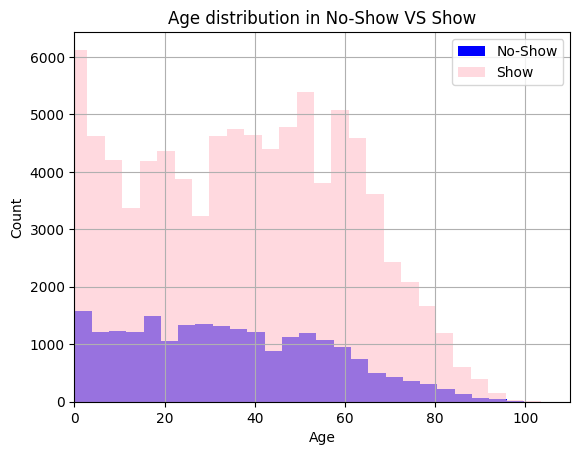

In [37]:
# Draw a histogram to see the disrtibution of Age in No-Show and Show group
df[df['No-show'] == 'Yes']['Age'].hist(label='No-Show', bins=30, color='blue')
df[df['No-show'] == 'No']['Age'].hist(alpha=0.6, label='Show', bins=30, color='pink')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution in No-Show VS Show')
plt.legend(loc=0)
plt.xlim(0,110);



In [25]:
#Test:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

No-show
No     37.790064
Yes    34.317667
Name: Age, dtype: float64


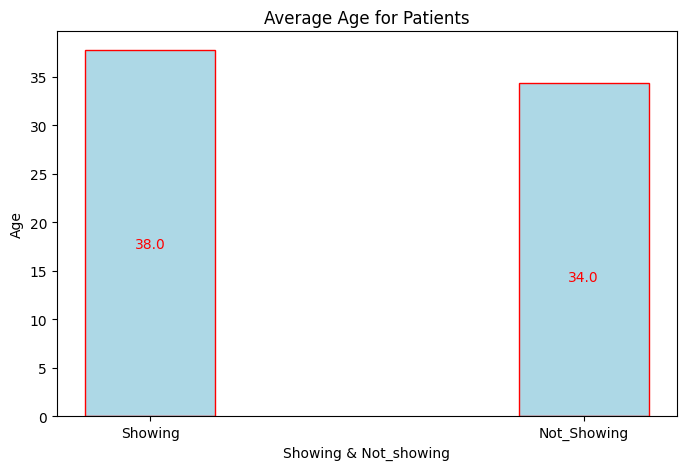

In [26]:
avg_age=df.groupby('No-show')['Age'].mean()
print(avg_age)

# Plotting results:
x=[1,2]
y=avg_age.values
fig=plt.figure(figsize=(8,5))
plt.bar(x,y,width=0.3,edgecolor='red',facecolor='lightblue')
label=['Showing','Not_Showing']
plt.xticks(x,label)
plt.xlabel('Showing & Not_showing')
plt.ylabel('Age')
plt.title('Average Age for Patients')

for xx,yy in zip(x,y):
    plt.text(xx,yy-20,yy.round(decimals=0),va='center',ha='center',color='red');

### Proprtion of patients who take scholarship!?

In [27]:
df['Scholarship'].mean()

0.09826558216544373

Scholarship
0    0.901734
1    0.098266
Name: PatientId, dtype: float64


Text(0.5, 1.0, 'Scholered & Not_Scholored Patients')

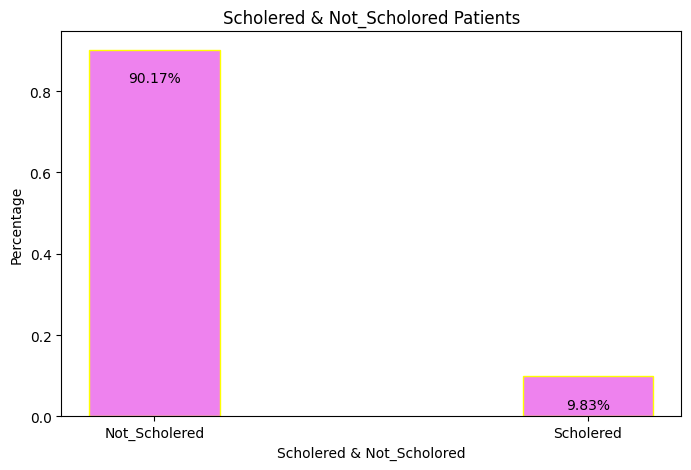

In [28]:
# Plot percentage of patient who take scholarship and those who don't take:
scholars= df.groupby('Scholarship').count()['PatientId']/df['PatientId'].count()
print(scholars)

# Plotting Results:
x=[1,2]
y= scholars.values
fig=plt.figure(figsize=(8,5))
plt.bar(x,y,width=0.3,edgecolor='yellow',facecolor='violet')
plt.xticks(x,['Not_Scholered','Scholered']);
for xx,yy in zip(x,y):
    plt.text(xx,yy-0.08, str((yy*100).round(decimals=2)) + '%' , ha='center')
    
plt.xlabel('Scholered & Not_Scholored')
plt.ylabel('Percentage')
plt.title('Scholered & Not_Scholored Patients')

In [29]:
# The count in each group of gender and no-show
df.groupby('No-show')['Gender'].value_counts()

No-show  Gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: Gender, dtype: int64

In [30]:
# The count in each group of Diabetes and no-show
df.groupby('No-show')['Diabetes'].value_counts()

No-show  Diabetes
No       0           81695
         1            6513
Yes      0           20889
         1            1430
Name: Diabetes, dtype: int64

In [31]:
#  The count in each group of SMS_received and no-show
df.groupby('No-show')['SMS_received'].value_counts()

No-show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
Name: SMS_received, dtype: int64

In [36]:
# print out a few lines for the patients that showed up
ShowupPatients = df[showup].head()
ShowupPatients

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


I want to see if the patient's absence at their appointment was due to them not having a scholarship

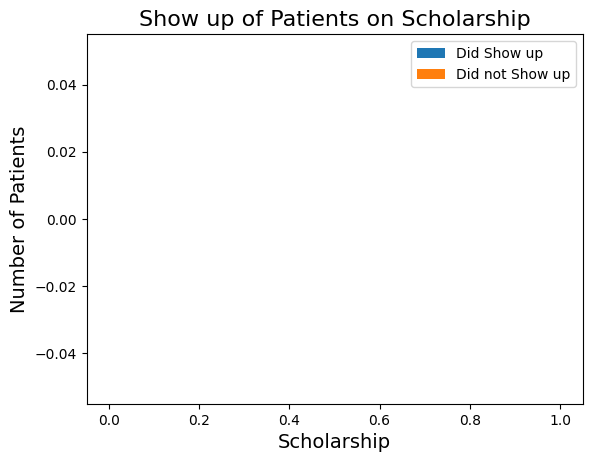

In [17]:
# Making a visual relationship between receiving a scholarship and showing up for appointment
df.Scholarship[showup].hist(label = 'Did Show up'),
df.Scholarship[noshowup].hist(label = 'Did not Show up');
plt.grid(False)
plt.title('Show up of Patients on Scholarship', fontsize=16)
plt.xlabel('Scholarship', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.legend();

## Convert categorical data Gender into numberical veriable  

In [38]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['Gender'] = labelencoder.fit_transform(df['Gender']) #fitting and transforming the desired cat

In [40]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['No-show'] = labelencoder.fit_transform(df['No-show']) #fitting and transforming the desired cat

In [43]:
df['No-show'].unique()

array([0, 1])

In [44]:
df['Gender'].unique()

array([0, 1])

In [45]:
df['Hipertension'].unique()

array([1, 0], dtype=int64)

In [46]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


### Metrics to check the quality of Machine Learning Models

In [59]:
import  numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,confusion_matrix ,classification_report,f1_score,accuracy_score,r2_score



In [60]:
# we take Gender ,age and Hipertension paramters  in X  and y we take Diabets 
X= df[['Gender','Age','Hipertension']]
y = df["No-show"]

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101) 

### K-Nearest Neighbors Classifier
KNN makes predictions according to the class density of the nearest neighbors of the vector formed by the independent variables of the value to be predicted

In [71]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
k.fit(x_train,y_train)
result=k.predict(x_test)
print(accuracy_score(y_test,result))

0.7656702374059062


### Logistic Regression
Logistic Regression tries to find the best line that separates the two classes. It is frequently used in linear classification problems. Because of linearity, it is very similar to Linear Regression.

Support Vector Machine tries to find the best line that separates the two classes just like logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8007382744643892


In [67]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8007382744643892


### DecisionTreeClassifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
y_pred=d.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8007020845396642


### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8006658946149392
